In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

  $$ \begin{align*} E &= - \frac{J}{2}\sum_{<i,j>} \sigma_i\sigma_j \\
   dE &= 2\cdot\sigma_i\sum_{<i,j>}\sigma_j
   \end{align*}
  
  
  
  $$

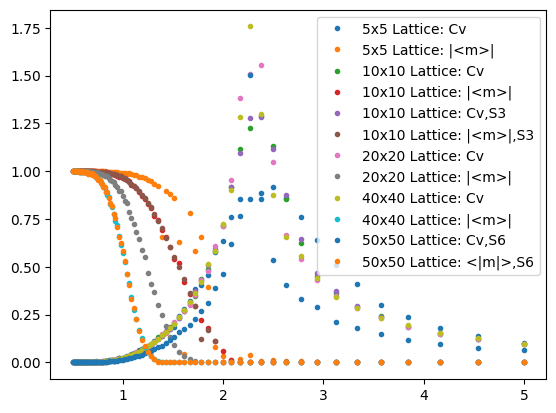

In [78]:
data = np.loadtxt("../build/simulation1.txt") # 5x5 Lattice, 10000 Sweep, ignore first 5000
N = 5**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="5x5 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="5x5 Lattice: |<m>|")

data = np.loadtxt("../build/simulation2.txt") # 10x10 Lattice, 10000 Sweep, ignore first 5000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="10x10 Lattice: |<m>|")
plt.legend()
data = np.loadtxt("../build/simulation3.txt") # 10x10 Lattice, 50000 Sweep, ignore first 20000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv,S3")
plt.plot(x,abs(y2),'.',label="10x10 Lattice: |<m>|,S3")
plt.legend()

data = np.loadtxt("../build/simulation4.txt") # 20x20 Lattice, 10000 Sweep, ignore first 5000
N = 20**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="20x20 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="20x20 Lattice: |<m>|")
plt.legend()

data = np.loadtxt("../build/simulation5.txt") # 40x40 Lattice, 200000 Sweep, ignore first 10000
N = 40**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="40x40 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="40x40 Lattice: |<m>|")

data = np.loadtxt("../build/simulation6.txt") # 50x50 Lattice, 200000 Sweep, ignore first 10000
N = 50**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="50x50 Lattice: Cv,S6")
plt.plot(x,abs(y2),'.',label="50x50 Lattice: <|m|>,S6")
plt.legend()
plt.show()

In [79]:
N = 40
Spin_2D = np.random.randint(-1,2,(N,N),dtype=int)
Spin_2D[Spin_2D==0] = 1
def del_E(Spin_2D,i,j):
    dE = Spin_2D[i][j]*(Spin_2D[i][(j-1+N)%N]+Spin_2D[(i+1+N)%N][j]+Spin_2D[i][(j+1)%N]+Spin_2D[(i-1+N)%N][j])
    return 2*dE
def Ising_sweep(B):
    for i in range(N):
        for j in range(N):
            de = del_E(Spin_2D,i,j)
            if(de<=0 or np.random.rand()<np.exp(-B*de)):
                Spin_2D[i][j] *= -1 




In [80]:
sweeplength = 5000
B = np.linspace(0.2,2,20)
spin = []
for i in B:
    avg_spin = []
    for k in range(sweeplength):
        Ising_sweep(i)
        if(k > 1000):
            avg_spin.append(np.abs(np.mean(Spin_2D)))
    spin.append(np.mean(avg_spin))



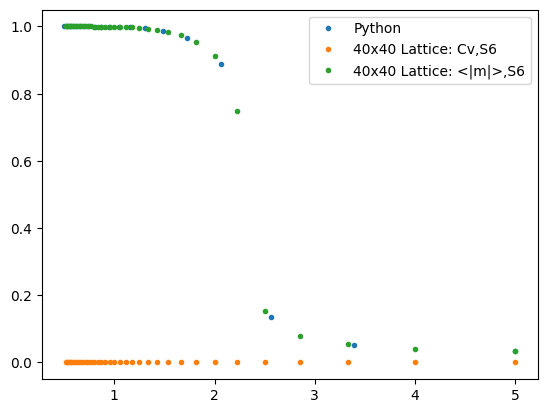

In [86]:
plt.plot(1/B,spin,'.',label='Python')
data = np.loadtxt("../build/simulation7.txt") # 40x40 Lattice, 5000 Sweep, ignore first 1000
N = 40**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
#plt.plot(x,y/N,'.',label="40x40 Lattice: Cv,S6")
plt.plot(x,abs(y2),'.',label="40x40 Lattice: <|m|>,S6")
plt.legend()

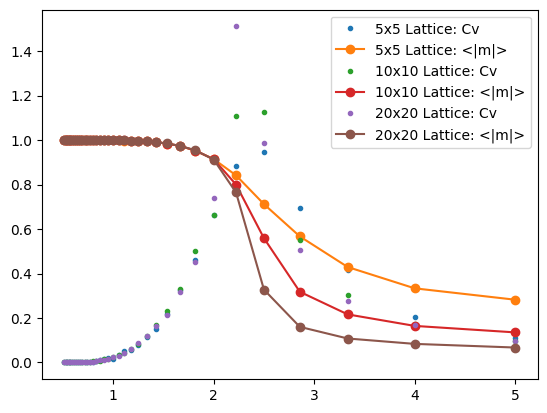

In [166]:
data = np.loadtxt("../build/simulation8.txt") # 5x5 Lattice, 5000 Sweep, ignore first 2000
N = 5**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="5x5 Lattice: Cv")
plt.plot(x,abs(y2),'o-',label="5x5 Lattice: <|m|>")
data = np.loadtxt("../build/simulation9.txt") # 10x10 Lattice, 6000 Sweep, ignore first 3000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv")
plt.plot(x,abs(y2),'o-',label="10x10 Lattice: <|m|>")

data = np.loadtxt("../build/simulation10.txt") # 20x20 Lattice, 6000 Sweep, ignore first 3000
N = 20**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="20x20 Lattice: Cv")
plt.plot(x,abs(y2),'o-',label="20x20 Lattice: <|m|>")

plt.legend()
plt.show()

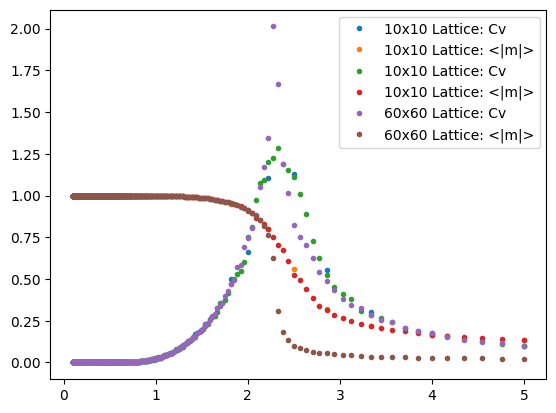

In [3]:
data = np.loadtxt("../build/simulation9.txt") # 10x10 Lattice, 6000 Sweep, ignore first 3000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="10x10 Lattice: <|m|>")

data = np.loadtxt("../build/simulation11.txt") # 10x10 Lattice, 5000 Sweep, ignore first 1000
# Change methode to calculate Energy
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="10x10 Lattice: <|m|>")

data = np.loadtxt("../build/simulation12.txt") # 60x60 Lattice, 10000 Sweep, ignore first 5000
# Change methode to calculate Energy
N = 60**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="60x60 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="60x60 Lattice: <|m|>")
plt.legend()
plt.legend()
plt.show()

2.27273


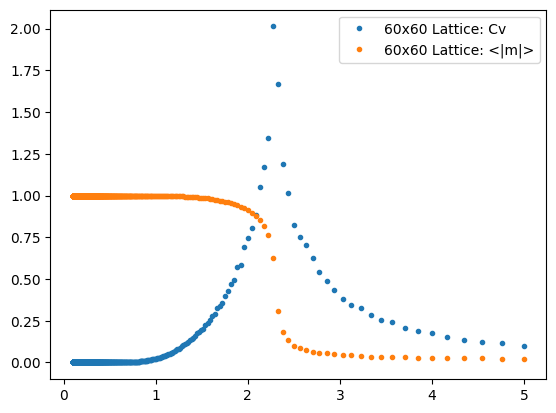

In [42]:
data = np.loadtxt("../build/simulation12.txt") 
N = 60**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="60x60 Lattice: Cv")
plt.plot(x,y2,'.',label="60x60 Lattice: <|m|>")
print(x[24])
plt.legend()
plt.show()

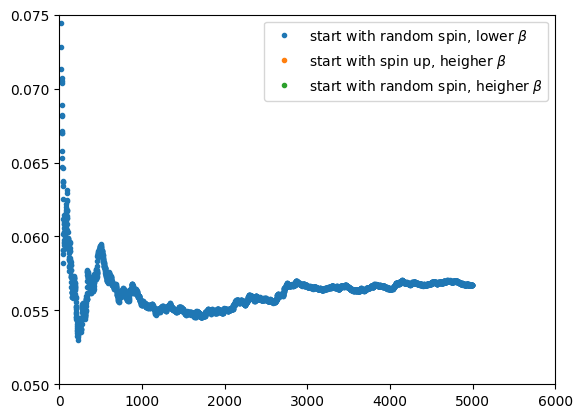

In [5]:
data1 = np.loadtxt("../build/simulation13.txt") 
data2 = np.loadtxt("../build/simulation14.txt") 
data3 = np.loadtxt("../build/simulation15.txt") 
y1 = data1[:,1]
y2 = data2[:,1]
y3 = data3[:,1]


def mean(y):
    N = 0
    s = 0
    a = []
    for i in y:
        s += i
        N +=1
        a.append(s/N)
    return np.array(a)
a = mean(y1)
b = mean(y2)
c = mean(y3)
plt.plot(a,'.',label=r"start with random spin, lower $\beta$")
plt.plot(b,'.',label=r"start with spin up, heigher $\beta$")
plt.plot(c,'.',label=r"start with random spin, heigher $\beta$")

plt.legend()
plt.xlim(0,6000)
plt.ylim(0.05,0.075)
plt.show()

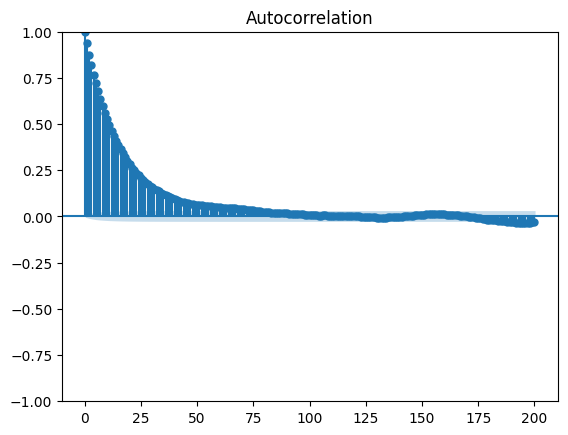

In [4]:
data = np.loadtxt("../build/simulation17.txt") 
x_1 = data[:,0]
y_1 = data[:,1]
z = data[:,2]
#plt.plot(x,'.')
y = y_1[1:]-y_1[:-1]
plot_acf(y_1,lags=(200))
plt.show()

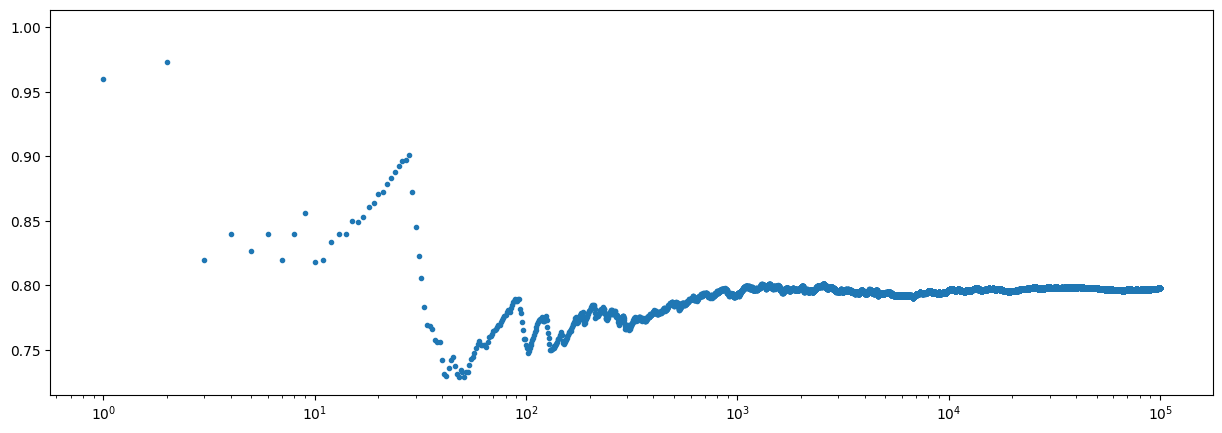

In [52]:
data = np.loadtxt("../build/simulation19.txt")  #  5x5 Lattice
x = data
fig = plt.figure(figsize=(15,5))
plt.plot(x,'.')
#plt.ylim(0.58,0.62)
#plt.xlim(0,30000)
plt.xscale('log')
plt.show()

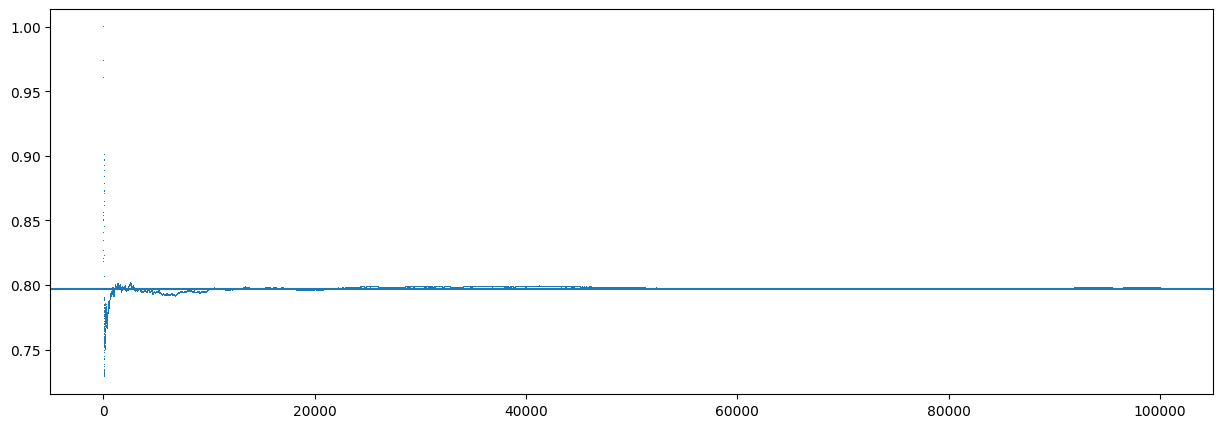

In [53]:
fig = plt.figure(figsize=(15,5))
plt.axhline(np.mean(x),0,1) 
plt.plot(x,',')
#plt.ylim(0.79,0.81)
plt.show()

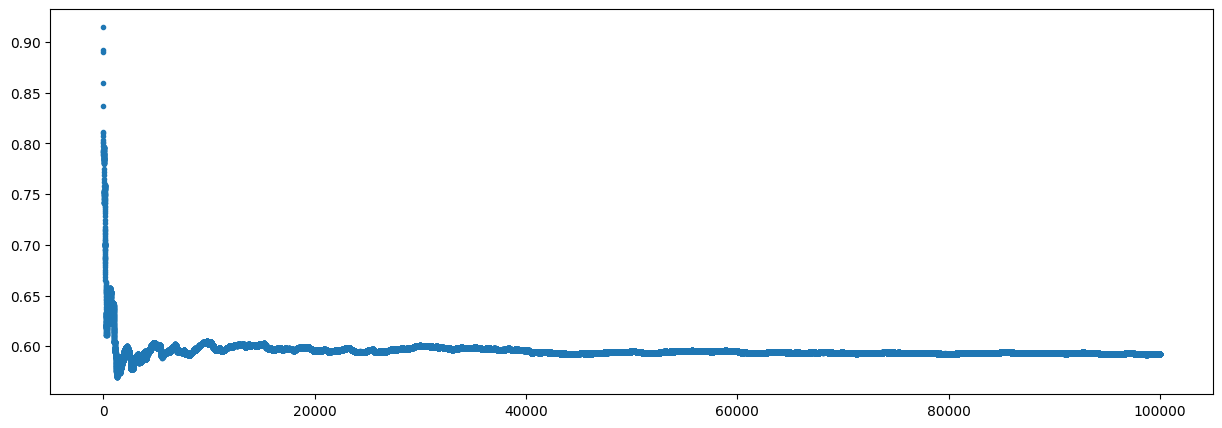

In [5]:
data = np.loadtxt("../build/simulation18.txt") # 20x20 Lattice
x = data
fig = plt.figure(figsize=(15,5))
plt.plot(x,'.')
#plt.ylim(0.58,0.62)
#plt.xlim(0,30000)
#plt.xscale('log')
plt.show()

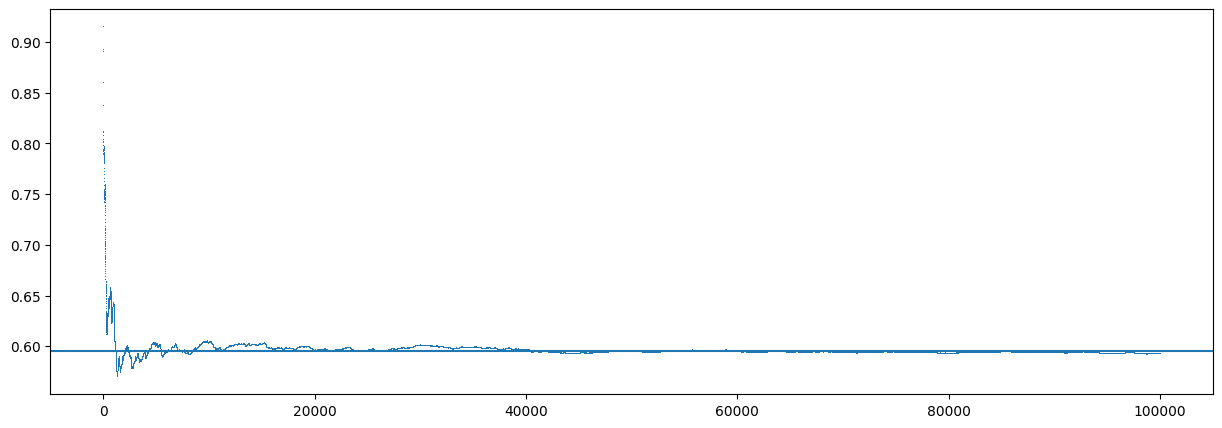

In [55]:

fig = plt.figure(figsize=(15,5))
plt.axhline(np.mean(x),0,1) 
plt.plot(x,',')
plt.show()

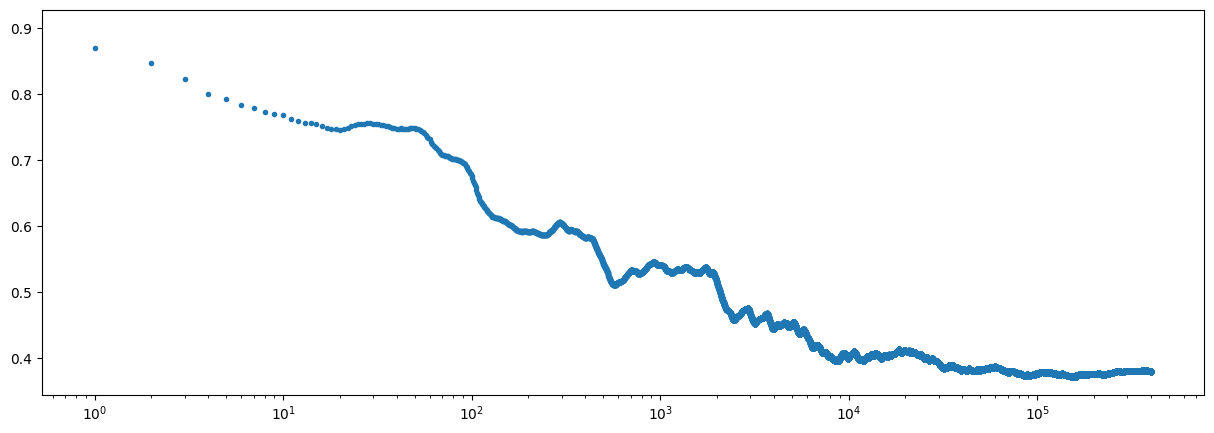

In [58]:
data = np.loadtxt("../build/simulation20.txt")  #  50x50 Lattice
x = data
fig = plt.figure(figsize=(15,5))
plt.plot(x,'.')
#plt.ylim(0.58,0.62)
#plt.xlim(0,30000)
plt.xscale('log')
plt.show()

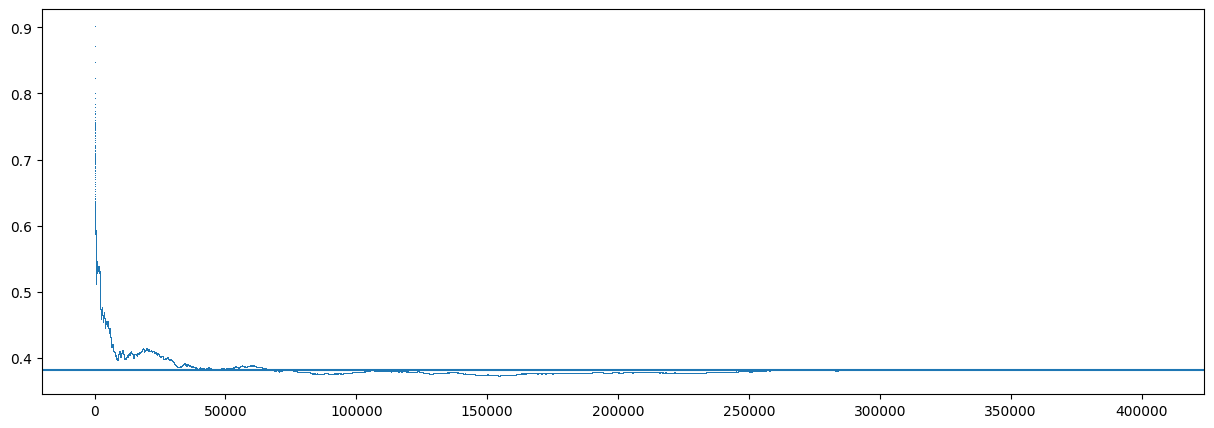

In [59]:
fig = plt.figure(figsize=(15,5))
plt.axhline(np.mean(x),0,1) 
plt.plot(x,',')
plt.show()

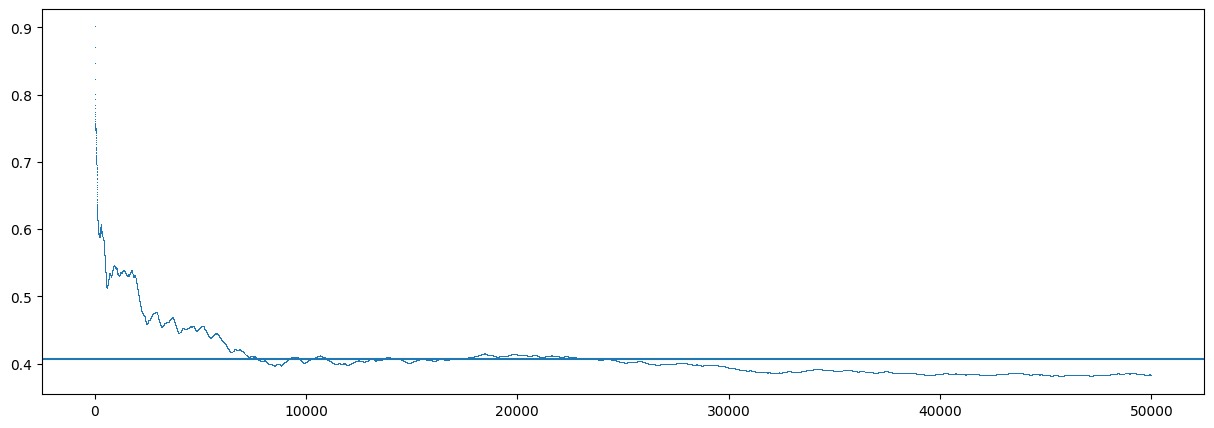

In [60]:
x = x[:50000]
fig = plt.figure(figsize=(15,5))
plt.axhline(np.mean(x),0,1) 
plt.plot(x,',')
plt.show()

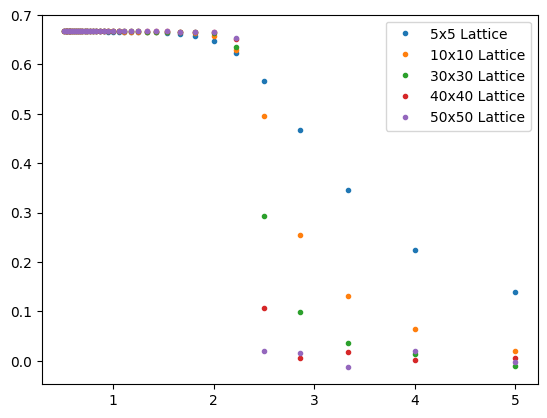

In [67]:
data = np.loadtxt("../build/simulation21.txt")  #  5x5 Lattice
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'.',label='5x5 Lattice')

data = np.loadtxt("../build/simulation22.txt")  #  10x10 Lattice
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'.',label='10x10 Lattice')

data = np.loadtxt("../build/simulation23.txt")  #  30x30 Lattice
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'.',label='30x30 Lattice')

data = np.loadtxt("../build/simulation24.txt")  #  40x40 Lattice
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'.',label='40x40 Lattice')

data = np.loadtxt("../build/simulation25.txt")  #  50x50 Lattice
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'.',label='50x50 Lattice')

plt.legend()
plt.show()


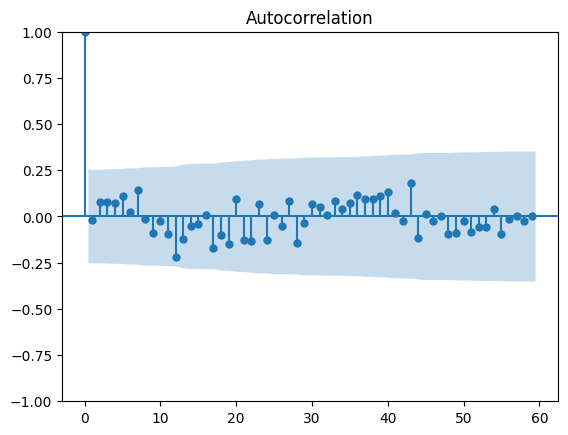

In [16]:
data = np.loadtxt("../build/simulation26.txt")  # 
plot_acf(data,lags=(len(data)-1))
plt.show()

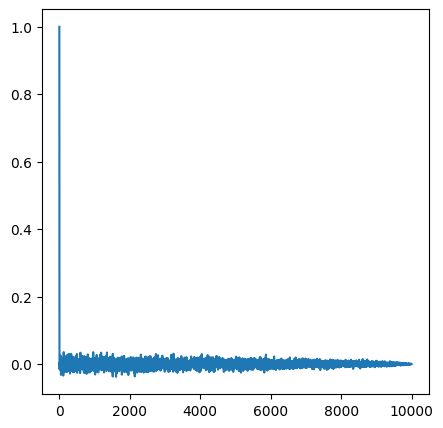

In [37]:
data = np.loadtxt("../build/simulation28.txt")  #  50x50 Lattice
x = data[:,0]
#data = data[4000:4500]
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x)
#plt.ylim(-0.25,0.25)
plt.show()

/tmp/ipykernel_250494/279734181.py:4: RuntimeWarning: divide by zero encountered in divide
  y_achse = x_achse/(-np.log(abs(x_1)))


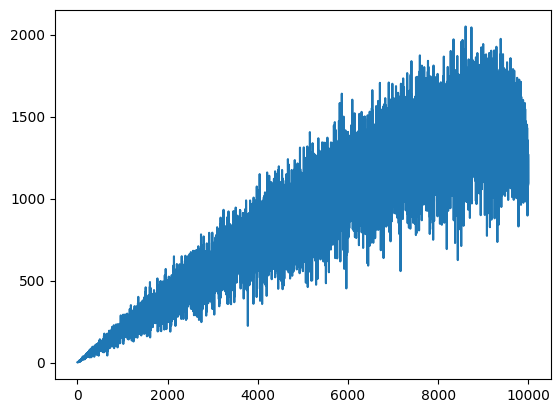

In [38]:
x_1= np.trim_zeros(x)
y = len(x_1)
x_achse = np.arange(1,y+1)
y_achse = x_achse/(-np.log(abs(x_1)))
plt.plot(x_achse,y_achse)
plt.show()

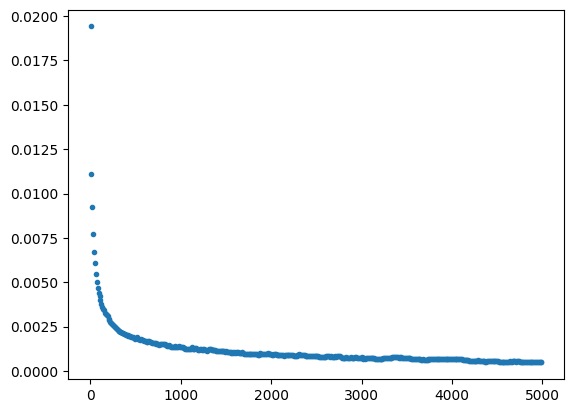

In [5]:
data = np.loadtxt("../build/analysis1.txt") 
plt.plot(data[:,1],data[:,0],'.')
plt.show()


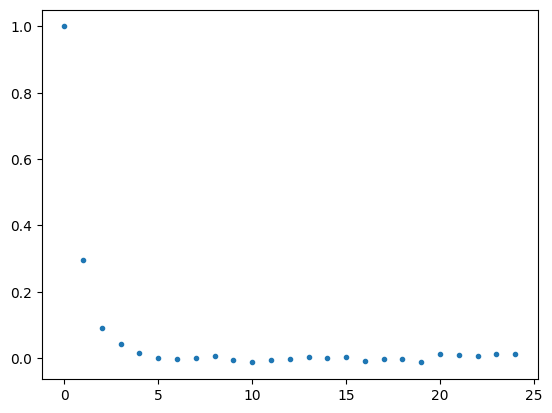

In [21]:
data = np.loadtxt("../build/analysis1.txt") 
plt.plot(data[:,0],'.')
plt.show()

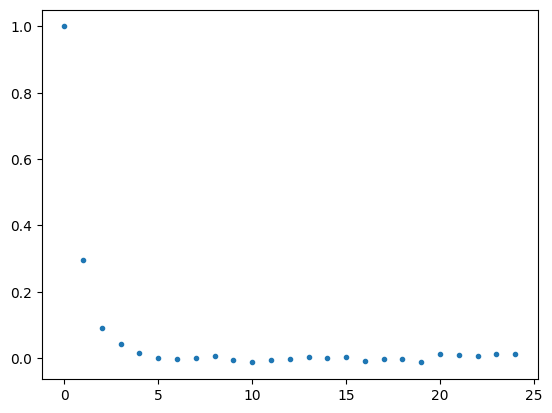

In [23]:
data = np.loadtxt("../build/analysis1.txt") 
plt.plot(data[:,0],'.')
plt.show()

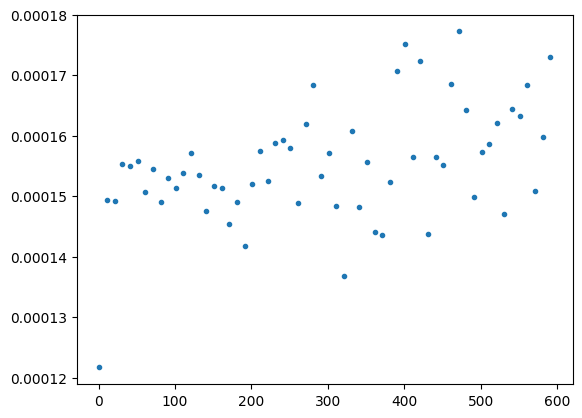

In [20]:
data = np.loadtxt("../build/analysis2.txt") 
plt.plot(data[:,1],data[:,0],'.')
plt.show()

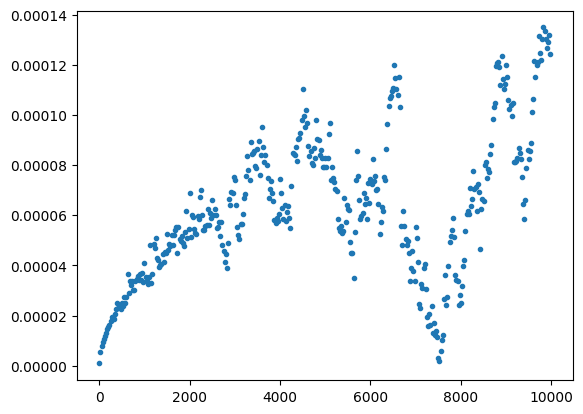

In [29]:
data = np.loadtxt("../build/analysis2.txt") 
plt.plot(data[:,1],data[:,0],'.')
plt.show()